In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',25)

In [148]:
df = pd.read_csv('development_dataset.csv')
#df.describe()

In [149]:
#converting object type VAR14 to float type
df['VAR14'].replace(to_replace='.',value=np.nan,inplace=True)
df['VAR14']=pd.to_numeric(df['VAR14'])

In [150]:
# mapping assigned lines
df['VAR21']=df['VAR21'].map({'Low':1,'Medium':2,'High':3})

In [151]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].median())

In [152]:
df3 = df.drop(labels=['VAR1','VAR14','VAR10','VAR18','VAR19'],axis=1)
df3.shape

(34000, 16)

In [153]:
for cols in df3.columns:
    if (cols!='VAR21'):
        df3 = df3[np.abs(df3[cols]-df3[cols].mean()) <= (3*df3[cols].std())]
print(df3.shape)

(26057, 16)


In [154]:
line = df3['VAR21']
train = df3.drop(labels=['VAR21'],axis=1)
train.head()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR20
0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,22.086661,0.279273,100.083403,1.0,1.0,1.540594,965.345,100.104991
1,911.764706,0.027778,142.857143,611.574748,8.181818,1.344479,198.600020,22.086661,2.098360,15.012510,10.0,10.0,1.614613,965.345,146.654045
2,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,22.086661,0.453212,210.175146,10.0,10.0,1.044599,965.345,98.249570
3,892.941177,0.166667,142.857143,638.076431,9.090909,0.820218,197.355744,4.363431,2.098360,80.066722,10.0,10.0,1.145729,965.345,140.862306
4,914.117647,0.083333,142.857143,626.514988,5.181818,1.372928,198.790477,85.938202,2.098360,210.175146,10.0,10.0,1.558341,965.345,101.268503


In [155]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,line,test_size=0.25)  
print(xtrain.shape)
print(xtest.shape)

(19542, 15)
(6515, 15)


In [156]:
from sklearn.preprocessing import StandardScaler
trainx2 = StandardScaler().fit(xtrain).transform(xtrain.astype(float))

In [157]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(trainx2,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [158]:
ans = svc.predict(xtest)
accuracy_score(ytest,ans)

0.5493476592478895

In [159]:
testm = pd.read_csv("leaderboard_dataset.csv")
testm = testm.drop(labels=['VAR1','VAR19','VAR14','VAR10','VAR18'],axis=1)
for col in testm.columns:
    testm[col]=testm[col].fillna(df[col].median())

In [160]:
testm = StandardScaler().fit(testm).transform(testm.astype(float))
act = svc.predict(testm)
dfm = pd.DataFrame(np.arange(1,10001))
dfm.tail()

,0
9995,9996
9996,9997
9997,9998
9998,9999
9999,10000


In [161]:
dfm.insert(1,column='1',value=act)
dfm['1']=dfm['1'].map({1:'Low',2:'Medium',3:'High'})
dfm.head()

,0,1
0,1,Medium
1,2,Low
2,3,Medium
3,4,Low
4,5,Medium


In [162]:
dfm.to_csv("Tryna_analyze_IITGuwahati_8.csv",header=None,index=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0762859  0.07113146 0.05404057 0.06045906 0.06792163 0.063583
 0.06231711 0.0496608  0.02496276 0.05919503 0.06304856 0.05502684
 0.03051842 0.05608473 0.06294693 0.03652541 0.02138647 0.01042857
 0.07447675]


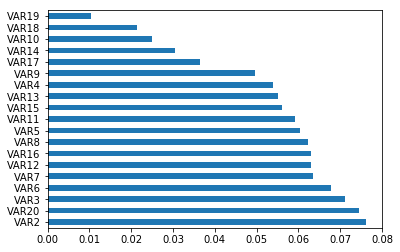

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train,line)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()